In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 13s 6us/step


In [7]:
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

8982
2246
8982
2246


In [61]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
word_index = reuters.get_word_index()
print(len(word_index))
word_index

557056/550378 [==============================] - 3s 6us/step
30979


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [13]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [11]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [30]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [32]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 118us/sample - loss: 2.6589 - acc: 0.4881 - val_loss: 1.7371 - val_acc: 0.6270
Epoch 2/20
7982/7982 [==============================] - 1s 86us/sample - loss: 1.4232 - acc: 0.7036 - val_loss: 1.3016 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 88us/sample - loss: 1.0578 - acc: 0.7734 - val_loss: 1.1480 - val_acc: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 88us/sample - loss: 0.8353 - acc: 0.8196 - val_loss: 1.0756 - val_acc: 0.7690
Epoch 5/20
7982/7982 [==============================] - 1s 88us/sample - loss: 0.6713 - acc: 0.8542 - val_loss: 0.9905 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.5354 - acc: 0.8831 - val_loss: 0.9547 - val_acc: 0.7960
Epoch 7/20
7982/7982 [==============================] - 1s 88us/sample - loss: 0.4366 - acc: 0.9048 - val_loss: 0.9281 - val_acc:

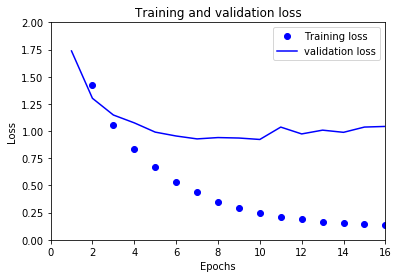

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.axis([0, 16, 0.0, 2.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

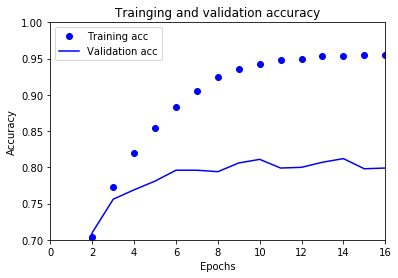

In [43]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainging and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 16, 0.7, 1.0])
plt.legend()
plt.show()

In [45]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 83us/sample - loss: 1.1976 - acc: 0.7898


In [49]:
prediction = model.predict(x_test)
prediction[0]

array([1.2765307e-05, 2.7646142e-06, 5.9850954e-08, 9.7413558e-01,
       2.3191452e-02, 1.8526407e-07, 4.8107398e-07, 1.6778094e-07,
       1.2344832e-04, 2.3527281e-08, 3.1236564e-07, 1.6955539e-04,
       2.3582329e-07, 1.5898322e-05, 1.1325554e-06, 2.1206048e-08,
       3.7302369e-05, 9.2002850e-08, 2.2379005e-08, 6.5004325e-04,
       1.5214185e-03, 2.6654148e-05, 1.9864601e-07, 6.6349567e-06,
       2.0008825e-08, 2.0927655e-06, 1.9457491e-09, 1.2345126e-08,
       6.0905273e-07, 2.8962397e-05, 5.4833517e-06, 3.2699618e-06,
       3.0509887e-07, 1.2729869e-07, 2.3613802e-06, 2.0511703e-08,
       4.6158886e-05, 6.4013342e-08, 1.0791631e-07, 1.2002303e-06,
       9.9735580e-06, 1.7653299e-06, 4.4699167e-08, 1.4887351e-07,
       1.0462844e-06, 1.2171833e-07], dtype=float32)

In [60]:
for i in range(30):
    print('예측결과 :',np.argmax(prediction[i]))
    print('정답 :',test_labels[i])
    print('===================================')

예측결과 : 3
정답 : 3
예측결과 : 1
정답 : 10
예측결과 : 1
정답 : 1
예측결과 : 4
정답 : 4
예측결과 : 13
정답 : 4
예측결과 : 3
정답 : 3
예측결과 : 3
정답 : 3
예측결과 : 3
정답 : 3
예측결과 : 3
정답 : 3
예측결과 : 3
정답 : 3
예측결과 : 1
정답 : 5
예측결과 : 4
정답 : 4
예측결과 : 1
정답 : 1
예측결과 : 3
정답 : 3
예측결과 : 1
정답 : 1
예측결과 : 11
정답 : 11
예측결과 : 4
정답 : 23
예측결과 : 3
정답 : 3
예측결과 : 19
정답 : 19
예측결과 : 3
정답 : 3
예측결과 : 8
정답 : 8
예측결과 : 3
정답 : 3
예측결과 : 3
정답 : 3
예측결과 : 3
정답 : 3
예측결과 : 9
정답 : 9
예측결과 : 3
정답 : 3
예측결과 : 4
정답 : 4
예측결과 : 6
정답 : 6
예측결과 : 10
정답 : 10
예측결과 : 3
정답 : 3
